In [1]:
import pandas as pd
from flair.models import TextClassifier
from flair.data import Sentence
import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


#### Loading the quotes about climate from 2018 and 2019

In [ ]:
df_18 = pd.read_pickle('data/climate_df_2018.pkl')

In [ ]:
df_19 = pd.read_pickle('data/climate_df_2019.pkl')

#### Using the Flair library to attribute a sentiment (Positive/Negative) and a score ([0,1]) to each quote in the dataframe

In [3]:
classifier = TextClassifier.load('en-sentiment')
def get_sentiment_score(text): 
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels

2021-12-16 14:15:28,099 loading file /home/jupyter-hannah/.flair/models/sentiment-en-mix-distillbert_4.pt


In [11]:
get_sentiment_score('It\'s time to act on climate change')

[POSITIVE (0.9962)]

In [6]:
get_sentiment_score('Climate change is real')

[POSITIVE (0.9976)]

In [7]:
get_sentiment_score('Climate change is an urgent matter')

[POSITIVE (0.9773)]

In [8]:
df_19['sentiment'] = df_19.apply(lambda x : get_sentiment_score(x.quotation), axis=1)

#### Writing the dataframes to pickle files for later use

In [9]:
df_19.to_pickle('data/climate_df_sentiments_2019.pkl')

In [ ]:
df_18.to_pickle('data/climate_df_sentiments_2018.pkl')

#### Reading the dataframes 

In [6]:
df_18 = pd.read_pickle('data/climate_df_sentiments_2018.pkl')

In [7]:
df_19 = pd.read_pickle('data/climate_df_sentiments_2019.pkl')

##### Mapping the sentiment score. Negative sentiments are mapped to negative floating point numbers, positive sentiments to positive ones. This allows to take the mean of the sentiment over a certain amount of time

In [8]:
def sentiment_mapping(df): 
    df['sentiment_score'] = df.sentiment.apply(lambda x: float(str(x)[11:-2]) if str(x)[1] == 'P' else -float(str(x)[11:-2]))

#### Extracting the month of the quote from the quoteID to be able to group them by time.  

In [9]:
def month_mapping(df): 
    df['month'] = df.quoteID.str.slice(start= 5, stop=7)

In [18]:
def plot_months(df, title): 
    #Plotting the number of quotes per month
    df.groupby('month')['quoteID'].count().plot(kind='bar', title=title)


In [11]:
def plot_wordcloud(df, title_text): 
    #Wordcloud for the specific dataframe
    text = "".join(quote for quote in df.quotation)
    wordcloud = WordCloud( background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title_text)
    plt.axis("off")
    plt.show()

In [12]:
def plot_sentiment_months(df):
    #Plotting the mean sentiment score of each month
    sentiment_monthly = df.groupby('month')['sentiment_score'].mean()
    fig = sns.lineplot(data=sentiment_monthly , x=sentiment_monthly.index, y=sentiment_monthly.values, legend='brief')
    fig.set(xlabel='month', ylabel='mean sentiment score', title='mean monthly sentiment score')
    

Mapping a month column and a sentiment_score column to the dataframes

In [13]:
month_mapping(df_18)
month_mapping(df_19)
sentiment_mapping(df_18)
sentiment_mapping(df_19)

#### Plotting the two years against each other to find similarities and differences

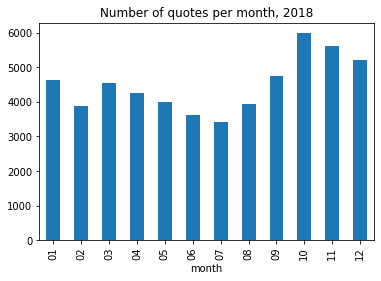

In [20]:
plot_months(df_18, 'Number of quotes per month, 2018')

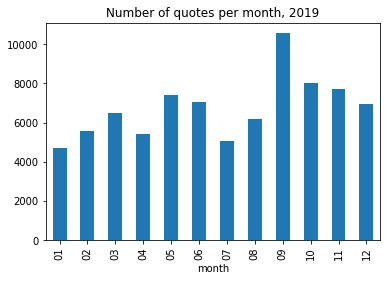

In [21]:
plot_months(df_19,'Number of quotes per month, 2019')

We can see a peak of quotes in september of 2019. Otherwise the quotecount doesn't fluctuate too much. Overall it can be said that in 2019 there are more quotes on climate change than in 2018.

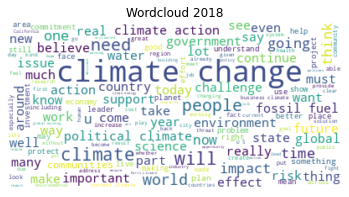

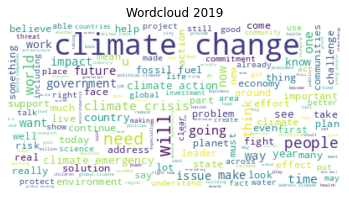

In [16]:
plot_wordcloud(df_18, 'Wordcloud 2018')
plot_wordcloud(df_19, 'Wordcloud 2019')

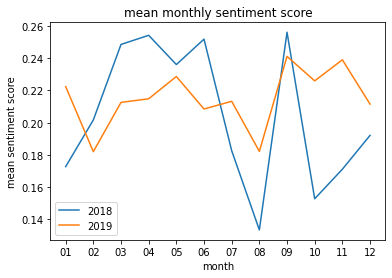

In [45]:
plot_sentiment_months(df_18)
plot_sentiment_months(df_19)
plt.legend(labels=["2018","2019"])

Interestingly, the two years follow a similar distribution of sentiment high and lows. In both years there is a drop on August followed by a peak in September.

##### Comparing Greta Thunberg's quotes over the two years

In [23]:
greta_18 = df_18[df_18.speaker.str.contains('greta thunberg', na=False, case=False)]
greta_19 = df_19[df_19.speaker.str.contains('greta thunberg', na=False, case=False)]

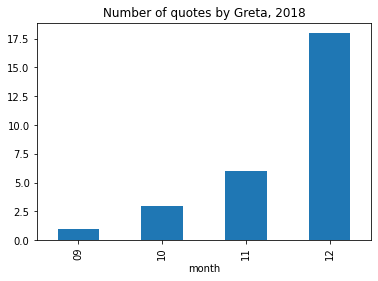

In [24]:
plot_months(greta_18, 'Number of quotes by Greta, 2018')

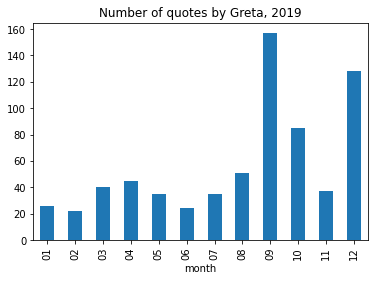

In [25]:
plot_months(greta_19, 'Number of quotes by Greta, 2019')

Here we can see already, that the Greta effect took of in 2019. She is quoted many more times than the year before. 

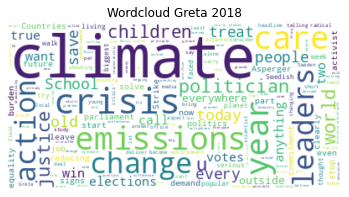

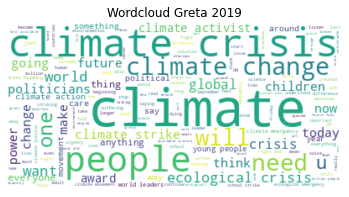

In [82]:
plot_wordcloud(greta_18, 'Wordcloud Greta 2018')
plot_wordcloud(greta_19, 'Wordcloud Greta 2019')

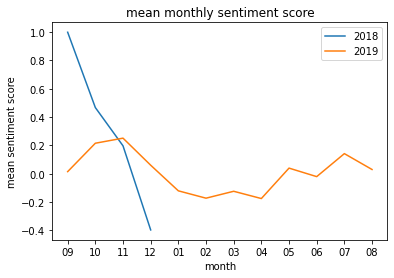

In [83]:
plot_sentiment_months(greta_18)
plot_sentiment_months(greta_19)
plt.legend(labels=["2018","2019"])

#### The graph above shows the average sentiment of Greta's quotations over the two years. The data from 2018 is not cmplete and furthermore the quotation count is much lower.

##### Comparing Donald Trump with Greta Thunberg in the year 2019

In [27]:
trump_19 = df_19[df_19.speaker.str.contains('donald trump', na=False, case=False)]
trump_18 = df_18[df_18.speaker.str.contains('donald trump', na=False, case=False)]

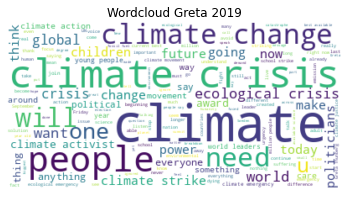

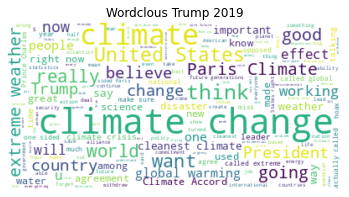

In [29]:
plot_wordcloud(greta_19, 'Wordcloud Greta 2019')
plot_wordcloud(trump_19, 'Wordclous Trump 2019')

In the wordclouds above one can already detect  difference in the words the two speakers use talking about climate change

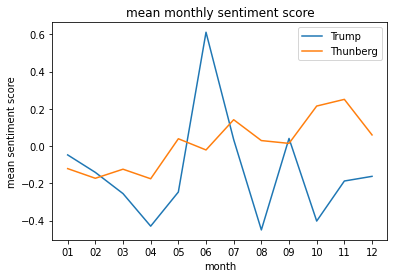

In [87]:
plot_sentiment_months(trump_19)
plot_sentiment_months(greta_19)
plt.legend(labels=["Trump","Thunberg"])

##### Comparing Trump before and after Greta

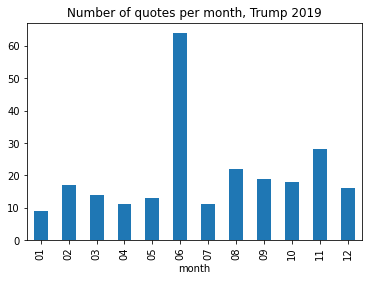

In [31]:
plot_months(trump_19, 'Number of quotes per month, Trump 2019')

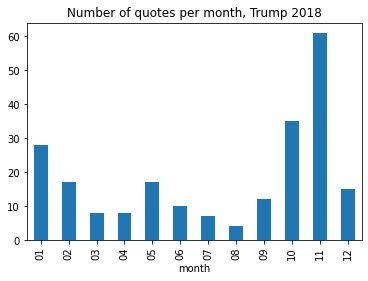

In [32]:
plot_months(trump_18, 'Number of quotes per month, Trump 2018')

For future work it will be interesting to look into the peaks on quotations on climate change. Do different speakers have similar peaks?

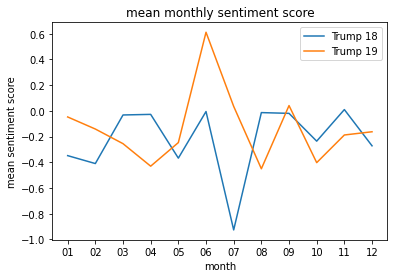

In [89]:
plot_sentiment_months(trump_18)
plot_sentiment_months(trump_19)
plt.legend(labels=["Trump 18","Trump 19"])